In [53]:

import warnings
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime
import re










# Analysis of tweets from City Year handles, ranking of number of followers, who sent the most-favorited tweets, 

-- tweets are from late 2016 to late Sept 2018, and were obtained from twitter api for free,  so twitter doesnt guarantee completeness like it does for paid access

In [54]:

allDF = pd.read_csv ("tweets_until_late_Sept.csv") 
#csv created from from using squlite and python twitter api access code published as open source code on curiositybits.com 


In [55]:
#allDF.columns

In [56]:
newDF = allDF

In [57]:

#get rid of retweets, ie only content created by a city year handle not stuff handles retweeted from other sources

newDF = allDF[allDF["retweeted_status"].isnull()] #.dropna(axis=1)




In [58]:
columns = ['rowid',
 'query',
 'user_type',
 'inserted_date',
 'truncated',
 'language',
 'possibly_sensitive',
 'retweeted_status',
 'withheld_in_countries',
 'withheld_scope',
 'created_at',
 'from_user_listed_count',
 'from_user_favourites_count',
 'from_user_statuses_count',
 'from_user_description',
 'from_user_location',
 'from_user_created_at',
 'entities_urls',
 'entities_urls_count',
 'entities_hashtags',
 'entities_hashtags_count',
 'entities_mentions',
 'entities_mentions_count',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'source',
 'entities_expanded_urls',
 'json_output',
 'media_url',
 'video_link',
 'photo_link',
 'twitpic',
 'num_characters',
 'num_words',
'coordinates',
           'entities_media_count',
           'media_expanded_url',
           'media_type'
           
          ]
newDF.drop(columns, inplace=True, axis=1)




In [59]:
timestamps = pd.to_datetime(newDF['created_at_text'], errors='coerce')

In [60]:
newDF["timestamp"] = pd.Series(timestamps, index = allDF.index)  



/Users/hw/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
#max(newDF.timestamp)

In [62]:
#min(newDF.timestamp)

In [63]:
#list(newDF)

In [64]:
followers = newDF[['from_user_screen_name', 'from_user_followers_count', 'timestamp']].copy()


In [65]:

groupedFollowers = followers.groupby('from_user_screen_name', as_index=False).max()

In [66]:
#sort by followers count
groupedFollowers = groupedFollowers.sort_values(by="from_user_followers_count",ascending=False)


## Rank City Year twitter handles by follower count

In [67]:
#get rid of extra column and make a graph
graphFollowers = groupedFollowers.drop('timestamp', 1)

graphFollowers

,from_user_screen_name,from_user_followers_count
2,CityYear,31711
12,CityYearLA,15001
4,CityYearBoston,7320
7,CityYearDC,5430
25,CityYearUK,5201
15,CityYearMiami,5102
18,CityYearNewYork,4821
21,CityYearPhilly,4321
6,CityYearChicago,4047
13,CityYearMKE,3951


In [68]:
#change column names
graphFollowers.columns = ['twitter_handle', 'followers']

## Graph City Year twitter handles by follower count

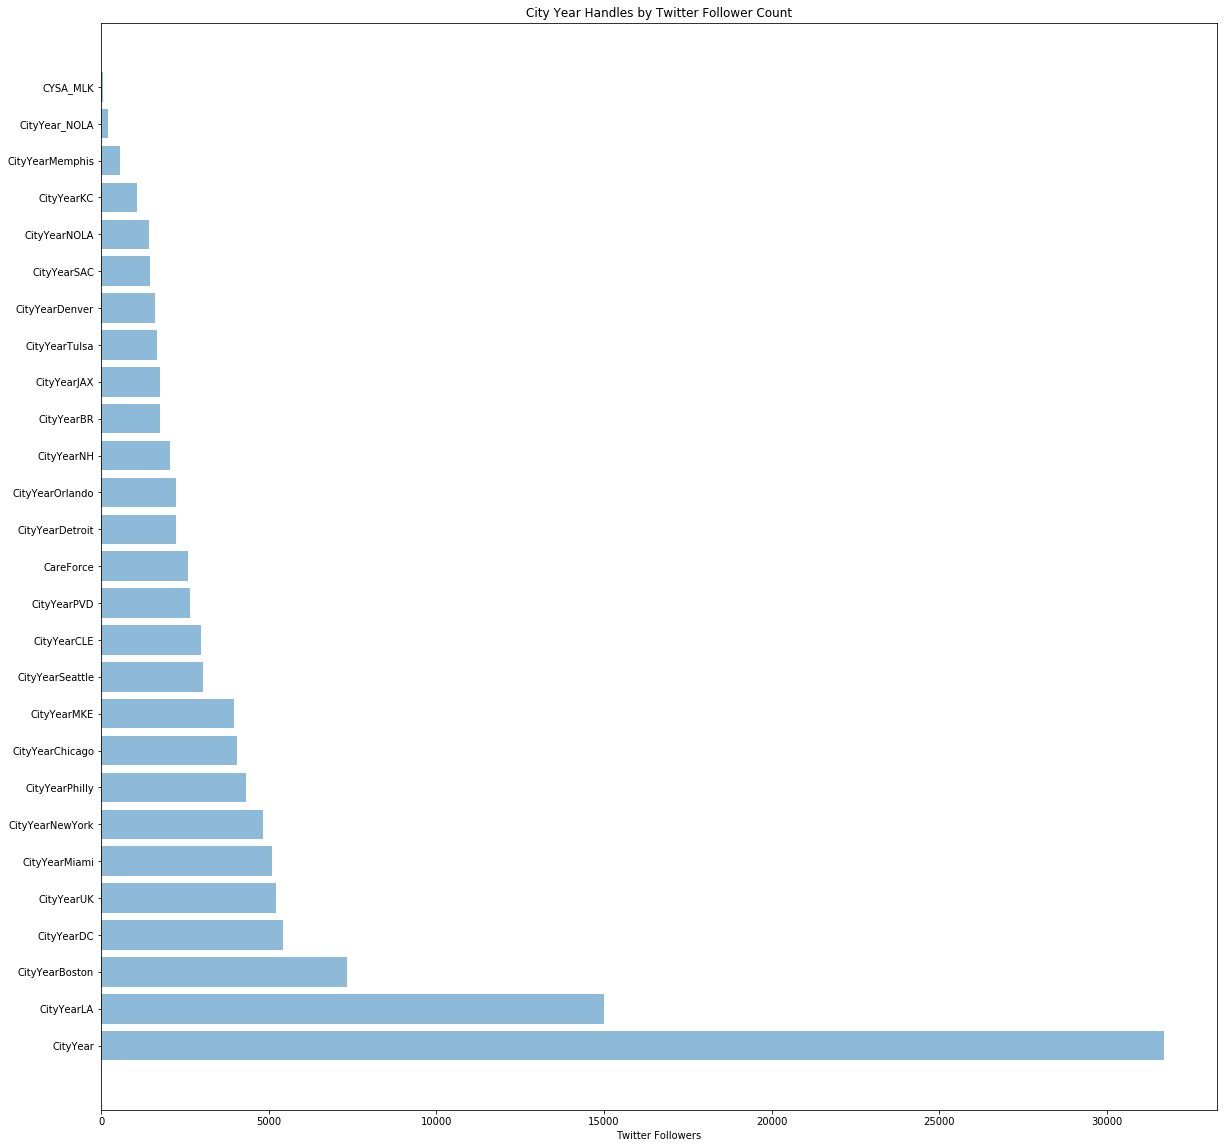

In [69]:
objects = graphFollowers.twitter_handle
y_pos = np.arange(len(objects))
performance = graphFollowers.followers
plt.figure(figsize=(20,20)) #figure size 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Twitter Followers')
plt.title('City Year Handles by Twitter Follower Count')

plt.show()

In [70]:
liked = newDF[['from_user_screen_name', 'favorite_count', 'timestamp']].copy()
#liked.head()



In [71]:

groupedLiked = liked.groupby('from_user_screen_name', as_index=False).max()

In [72]:
#sort by favorite count
groupedLiked = groupedLiked.sort_values(by="favorite_count",ascending=False)


In [73]:
#get rid of extra column and make a graph
graphLiked = groupedLiked.drop('timestamp', 1)

#graphLiked.head()

In [74]:
graphLiked.columns = ['twitter_handle', 'favorited count']

## FAVORITE TWEETS - what was the most-liked tweet for each handle, ie take all the tweets  for each handle and show the max number of likes its gotten for any tweet - (this doesnt include retweeted material, only actualy city created tweets)

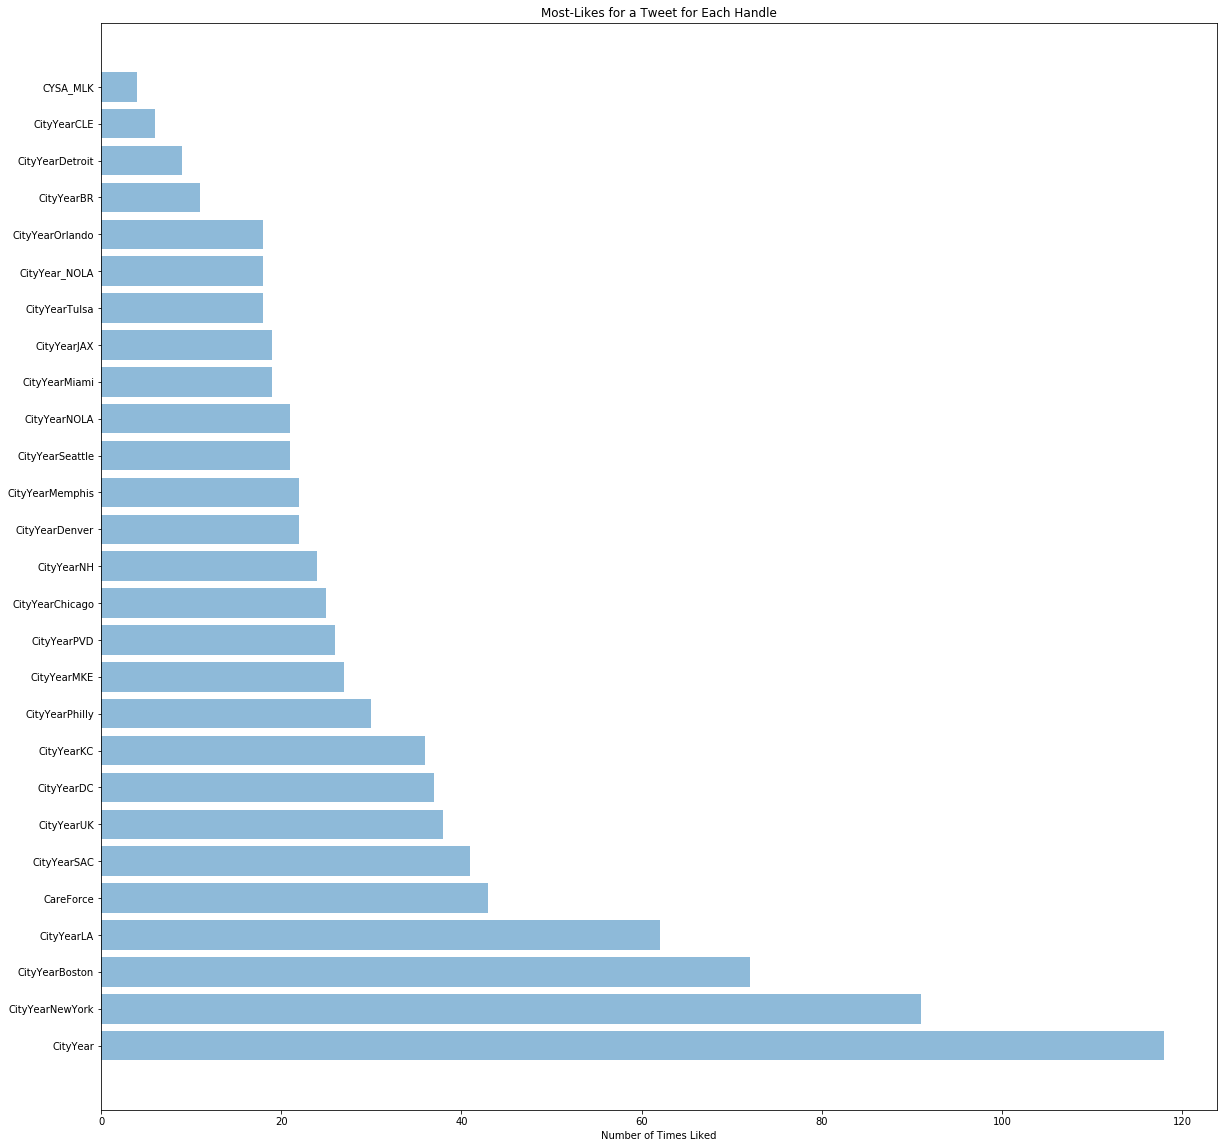

In [75]:
objects2 = graphLiked.twitter_handle
y_pos = np.arange(len(objects2))
performance2 = graphLiked['favorited count']
plt.figure(figsize=(20,20)) #figure size 
plt.barh(y_pos, performance2, align='center', alpha=0.5)
plt.yticks(y_pos, objects2)
plt.xlabel('Number of Times Liked')
plt.title('Most-Likes for a Tweet for Each Handle')
 
plt.show()

In [76]:

groupedMostLiked = liked.sort_values(by="favorite_count",ascending=False)
#there are 2383 entries, some are 0

In [77]:
#get rid of extra column and make a graph
groupedMostLiked = groupedMostLiked.drop('timestamp', 1)

In [78]:
groupedMostLiked.columns = ['twitter_handle', 'favorited count']
top10 = groupedMostLiked.head(10)

#  the top 10 most liked across all the handles were created by these handles:

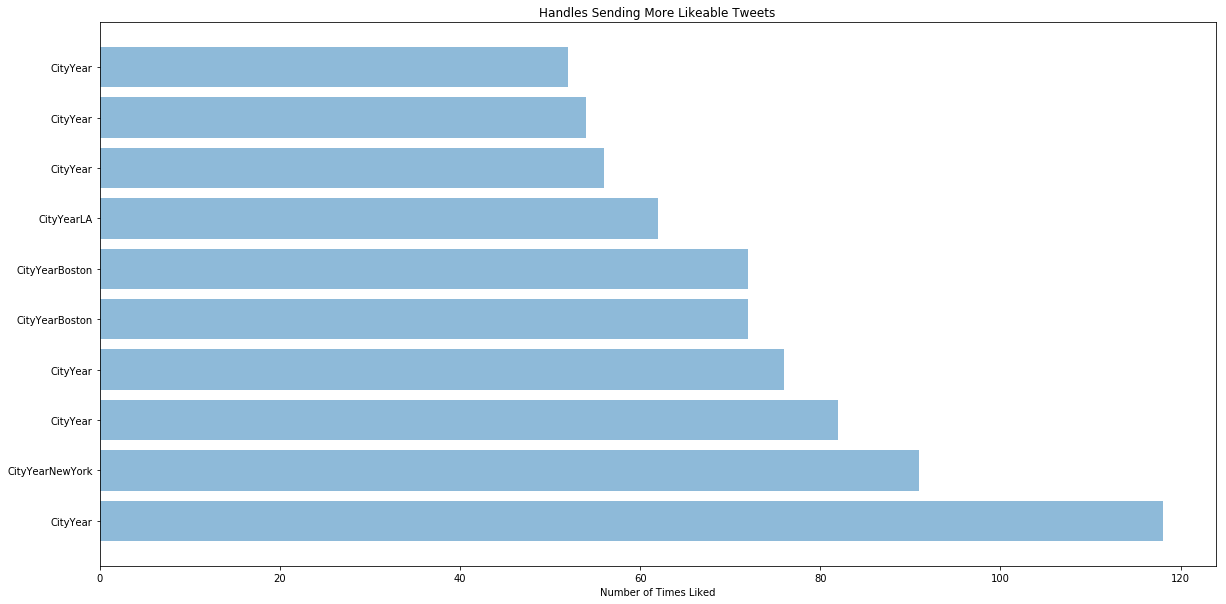

In [79]:
objects3 = top10.twitter_handle
y_pos = np.arange(len(objects3))
performance3 = top10['favorited count']
plt.figure(figsize=(20,10)) #figure size 
plt.barh(y_pos, performance3, align='center', alpha=0.5)
plt.yticks(y_pos, objects3)
plt.xlabel('Number of Times Liked')
plt.title('Handles Sending More Likeable Tweets')
 
plt.show()

In [80]:
#list(newDF)

# most RETWEETED tweets produced by city year handles (see the actual tweets that were both most retweeted/ most liked in other notebook)

In [81]:
retweeted = newDF[['from_user_screen_name', 'retweet_count', 'timestamp','content']].copy()



In [82]:

groupedMostRetweeted = retweeted.sort_values(by="retweet_count",ascending=False)
#print(groupedMostRetweeted.head(10)) #there are 2383 entries, some are 0


In [83]:
#get rid of extra column and make a graph
groupedMostRetweeted = groupedMostRetweeted.drop('timestamp', 1)

In [86]:
groupedMostRetweeted.columns = ['twitter handle', 'times retweeted','content']
top10retweets = groupedMostRetweeted.head(10)
print(top10retweets)

       twitter handle  times retweeted  \
3            CityYear               44   
149          CityYear               41   
171          CityYear               39   
4270  CityYearNewYork               35   
54           CityYear               30   
5042     CityYearNOLA               24   
5225         CityYear               22   
4272  CityYearNewYork               21   
2095   CityYearBoston               16   
2138   CityYearBoston               15   

                                                content  
3     .@BarackObama shares our belief in the power o...  
149   Dr. King dedicated his life to fighting for eq...  
171   At City Year we believe in the power of young ...  
4270  “I know that many of you are drawn to City Yea...  
54    Happy #PrideMonth We believe a culture of incl...  
5042  “Intelligence plus character-that is the goal ...  
5225  We will never forget Senator John McCain’s lif...  
4272  “As an actress and an activist, Mariska has he...  
2095  “What’s s

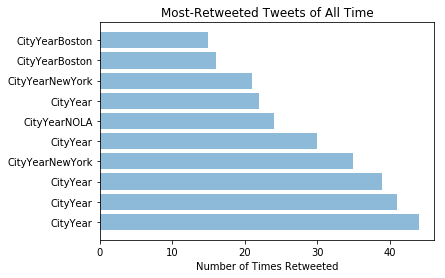

In [87]:
objects4 = top10retweets['twitter handle']
y_pos = np.arange(len(objects3))
performance4 = top10retweets['times retweeted']
 
plt.barh(y_pos, performance4, align='center', alpha=0.5)
plt.yticks(y_pos, objects4)
plt.xlabel('Number of Times Retweeted')
plt.title('Most-Retweeted Tweets of All Time')
 
plt.show()